## 머신러닝

### 머신러닝이란?

- 데이터(과거)를 기반으로 학습을 시켜 예측, 판단(미래)을 수행하는 기법
- 통계학, 데이터마이닝, 컴퓨터비전(간단히 말해 사진)이 어우러진 분야



- 문제데이터 : X, 특성, 독립변수...
- 정답데이터 : y, 라벨, 타겟, 종속변수...

### 머신러닝 종류

1. 지도학습(Supervised Learning)
- 데이터에 대한 Label(정답)이 주어진 상태에서 컴퓨터를 학습시키는 방법
- 예측하려는 값이 어떤지에 따라 분류와 회귀로 나뉨
    - 분류(Classification) : 예측하려는 값이 범주형 데이터인 경우. 다중분류와 이진분류로 나뉨.
        - 스팸메일 분류, MBTI 유형 분류, 성별 분류 등
    - 회귀(Regression) : 예측하려는 값이 연속형 데이터인 경우
        - 주가 예측, 집 가격 예측 등

2. 비지도학습(Unsupervised Learning)
- 데이터에 대한 Label(정답)이 없는 상태에서 컴퓨터를 학습시키는 방법
- 데이터의 숨겨진 특성, 구조, 패턴을 파악하는 데 활용
- 클러스터링(Clustering/군집화), 차원축소(Dimensionality Reduction) 등

3. 강화학습(Reinforcement Learning)
- 지도학습과 유사하나, Label(답)을 제공하지는 않음.
- 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습
- 게임이나 로봇을 학습시키는데 많이 사용

### 머신러닝 프로세스

1. 문제정의 -> 예측하려는 값을 정의(가능하면 구체적으로)
    - 현재 필요한 솔루션의 구성 파악
    - 지도, 비지도, 강화 선택
        - 지도 - 분류, 회귀 선택
2. 데이터 수집
    - File, Database, Web Crawler, IoT센서, 설문조사, API 등등...
3. EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
    - 분석적 접근, 기술통계를 통한 상관관계 파악, 그래프 확인
    - 시각화
4. 데이터 전처리
    1. 결측치 제거 및 대체
    2. 이상치 제거 및 대체
    3. 변수 처리(불필요한 컬럼 제거, 필요시 파생변수 추가, 인코딩(범주형 -> 수치형) 등. 여기서의 변수는 각각의 Series를 의미.)
    4. 데이터 분리(학습용 데이터와 평가용 데이터로 x값을 분리 - 모델링 시에만 진행)
    
cf) 3단계, 4단계는 순서 바뀌어도 상관없다.

<모델링>

5. Model 선택 및 Hyper Parameter(model의 성능을 개선하기 위해 사람이 직접 넣는 parameter)
    - 최적의 모델 선택 및 최적의 Hyper Parameter 선택 단계
    
6. Model 학습(Training)
    - fit() : 학습

7. Model 평가(Evaluation)
    - score() : 평가
    - 분류와 회귀의 평가지표 서로 상이

#### 원하는 위치에 커서 올려두고 ctrl + shift + '-' : 셀 분할
#### shift 누른 상태로 셀 다중선택하고 shift + m(merge) : 셀 병합

### 1. 문제정의
- 500명의 키, 몸무게 데이터를 활용해서 비만도를 판별하는 모델 생성
- 목적 : 머신러닝 프로세스 이해
- Class : 정답의 고유값
    - Extreme Obesity : 고도비만
    - Obesity : 비만
    - Overweight : 과체중
    - Normal : 정상
    - Weak : 저체중
    - Extremely Weak: 심한 저체중
    
- 다중분류 진행
    - 이진분류 : 2가지의 클래스를 분류
    - 다중분류 : 3가지 이상의 클래스를 분류

### 2. 데이터 수집

In [ ]:
#!pip install sklearn
    #사이킷런 설치 명령
    #앞의 !는 파이썬 언어가 아니라는 뜻

In [40]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#머신러닝 패키지
from sklearn.neighbors import KNeighborsClassifier #K-최근접이웃(KNN) 분류모델
#from sklearn.neighbors import KNeighborsRegressor KNN 회귀모델

from sklearn.metrics import accuracy_score # 정확도 측정도구

In [41]:
# 라이브러리의 내부 구성요소 알아보는 dir()함수
import sklearn
dir(sklearn)

##cf) 빅분기에서는 Tab자동완성 지원 안 하므로 dir()함수 애용하자

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'decomposition',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [7]:
# 데이터 불러오기
# index_col = '컬럼명' : 컬럼을 index로 설정
data = pd.read_csv("./data/bmi_500.csv", index_col="Label")
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


### 3. EDA(Exploratory Data Analysis)

### 4. 데이터 전처리

In [10]:
#.info()
#데이터 정보를 빠르게 확인
#전체 행의 개수, 열의 개수나 컬럼 정보 #
#결측치 여부 등

data.info()

#현재 데이터는 결측치가 없다!

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [ ]:
#4분위수 : 데이터의 분포를 가장 작은 수부터 큰 수로 나열하여 4등분한 결과값
#25% = Q1, 제1사분위수
#50% = Q2, 제2사분위수, 중앙값
#75% = Q3, 제3사분위수
#100% = Q4, 제4사분위수

#기술통계에서 가장 자주 보는 것 : 평균, 중앙값, 최빈값
#수치 데이터 : 평균, 중앙값
    #평균은 극단치 때문에 왜곡될 가능성이 있으므로 중앙값도 보는 것.
    #평균값과 중앙값 차이가 크면 이상치 있다는 판단 가능.
# 문자 데이터 : 최빈값

In [12]:
#통계는 기술통계와 추론통계로 나뉨
#.describe() : 기술통계량을 확인할 수 있는 함수
#기술통계량 -> 수치데이터들의 요약본
data.describe()
data.describe().T #전치해서 보기

#cnt : 개수
#mean : 평균
#std : 표준편차
#min : 최소값
#25~75% : 위 셀 참조
#max : 최대값

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0


In [13]:
data.describe(include='object').T
#include 속성 설정을 통해 수치데이터만이 아닌 문자데이터 요약본 확인 가능
#unique : 고유값(여기서는 남/녀)
#top : 최빈데이터
#freq : 최빈데이터의 빈도(개수) = 최빈값

,count,unique,top,freq
Gender,500,2,Female,255


In [22]:
data.index.unique()

pandas.core.indexes.base.Index

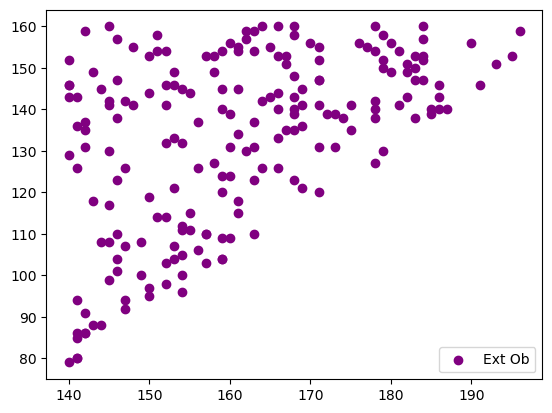

In [20]:
# 시각화(bmi 클래스별로 분포 현황 시각화)
#산점도(scatter)
#고도비만(Extreme Obesity)
E0 = data.loc["Extreme Obesity"] #인덱서의 행,열 순서에서 열은 생략 가능

#scatter(x축, y축)
plt.scatter(E0['Height'],E0['Weight'], color = "purple", label = 'Ext Ob')

#범례 표시 - label을 시각적으로 표기
plt.legend()

plt.show()



In [2]:
#함수 정의
def graph_draw(label, c) :
    E0 = data.loc[label] 
    plt.scatter(E0['Height'],E0['Weight'], color = c, label = label)

    - Extreme Obesity : 고도비만
    - Obesity : 비만
    - Overweight : 과체중
    - Normal : 정상
    - Weak : 저체중
    - Extremely Weak: 심한 저체중

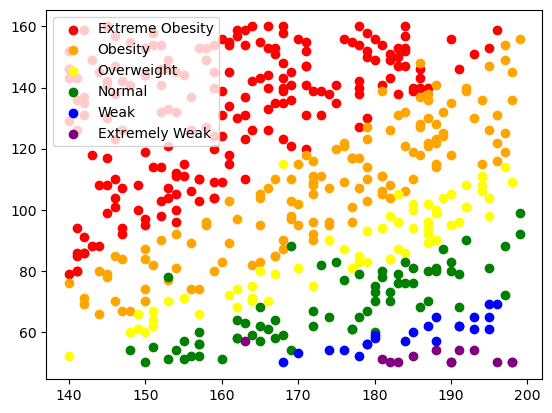

In [19]:
#함수 호출하기

#각 라벨에 따른 색상 지정
label_color = ["red",'orange','yellow','green','blue','purple']

#enumerate() : 인덱스 번호와 value를 함께 추출할 때 쓰는 함수

# for i,label in enumerate(data.index.unique()): 
#     print(i)
#     print(label)

#위 셀 순서대로 정렬하려면? 직접 라벨 순서대로 작성

label_list = ['Extreme Obesity','Obesity','Overweight','Normal',
              'Weak','Extremely Weak']

for i,label in enumerate(label_list): 
#     print(i)
#     print(label)
    graph_draw(label,label_color[i])
plt.legend()
plt.show()


In [20]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


- 데이터 분리
   - 문제데이터(X) : Height, Weight
   - 정답데이터(y) : Label
   - X를 대문자로 쓰고 y를 소문자로 쓰는 이유?
       - X는 2차원(복수 컬럼)이고 y는 1차원(컬럼 하나)이므로

In [22]:
#X = 문제데이터. 2차원
#다중인덱싱 활용해서 Height, Weight 인덱싱
#다중인덱싱은 2차원이므로 대괄호로 한 번 더 묶어줘야
X = data[['Height','Weight']]

In [21]:
#y = 정답데이터. 1차원.
y = data.index

In [28]:
#train, test 분리
#한정적인 데이터 내에서 학습하고 평가까지 해야 하므로 train과 test로 분리

#훈련용 데이터셋 : 500ea 70% = 350ea
data.shape

X_train = X.iloc[:350]
y_train = y[:350] #y는 1차원이므로 인덱싱 필요없이 슬라이싱만 하면 됨

#테스트용 데이터셋 : 30% = 150ea

X_test = X.iloc[350:]
y_test = y[350:]

In [29]:
#문제(X)와 정답(y) 개수가 동일한지 확인해야 한다.
X_train.shape, y_train.shape, X_test.shape, y_test.shape # 두 개의 행 개수가 같아야

((350, 2), (350,), (150, 2), (150,))

### 5. 모델선택 및 하이퍼파라미터 조정

### 6. 모델학습

In [31]:
#모델 생성(초기화)
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [33]:
#모델학습
#모델이름.fit(학습용 문제, 학습용 답) -> 지도학습의 경우
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
#모델 예측
#모델이름.predict(테스트용 문제)
pred = knn_model.predict(X_test) #모델이 테스트용 문제에 대해 내놓은 예측값

### 7. 모델평가

In [38]:
#평가방법
#1. 모델 자체에서 제공하는 평가 함수 활용 -> pred값 필요없음. test set만 넣어주면 됨
knn_model.score(X_test,y_test)
#결과값 : 정확도를 의미. 여기서는 약 90.67%

0.9066666666666666

In [44]:
#2. metrict 활용 -> pred 필요. 
accuracy_score(y_test,pred)

#평가 방법이 나뉘는 이유
#score()는 정확도 하나만 나옴
#평가 지표는 정확도 외에도 정밀도,재현율 등 다양한 것이 있으며 
#accuracy_score는 이를 제공한다.

0.9066666666666666